# Bitcoin Stock price Prediction 

In [1]:
# First we will import the necessary Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
# Load our dataset 
# Note it should be in same dir
show_data = pd.read_csv('C:/Users/ASUS/Desktop/bitcoin/Bitc.csv')

In [3]:
# Display the shape (dimensions) of the DataFrame 'show_data'
show_data.shape

(5911, 8)

In [4]:
# Display a summary of the DataFrame 'show_data'
# This includes the number of non-null entries in each column, and the data type of each column

show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5911 entries, 0 to 5910
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          5911 non-null   int64  
 1   Open               18 non-null     float64
 2   High               18 non-null     float64
 3   Low                18 non-null     float64
 4   Close              18 non-null     float64
 5   Volume_(BTC)       18 non-null     float64
 6   Volume_(Currency)  18 non-null     float64
 7   Weighted_Price     18 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 369.6 KB


In [5]:
# Display the entire DataFrame 'show_data'
# This will print the DataFrame, showing all rows and columns
# Depending on the size of the DataFrame, the output might be truncated in the console

show_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5906,1325320260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5907,1325320260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5908,1325320260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5909,1325320260,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display descriptive statistics of the DataFrame 'show_data'
show_data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,5.911000e+03,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.325320e+09,4.953333,4.957222,4.953333,4.957222,13.111398,63.905817,4.954801
std,1.115750e+02,0.333325,0.328093,0.333325,0.328093,14.099655,65.876538,0.331264
min,1.325318e+09,4.390000,4.390000,4.390000,4.390000,0.020000,0.102800,4.390000
25%,1.325320e+09,4.645000,4.645000,4.645000,4.645000,2.344793,11.795700,4.645000
50%,1.325320e+09,5.000000,5.000000,5.000000,5.000000,9.840000,48.061200,5.000000
75%,1.325320e+09,5.282500,5.282500,5.282500,5.282500,17.107361,86.355000,5.282500
max,1.325320e+09,5.320000,5.320000,5.320000,5.320000,48.000000,210.720000,5.320000


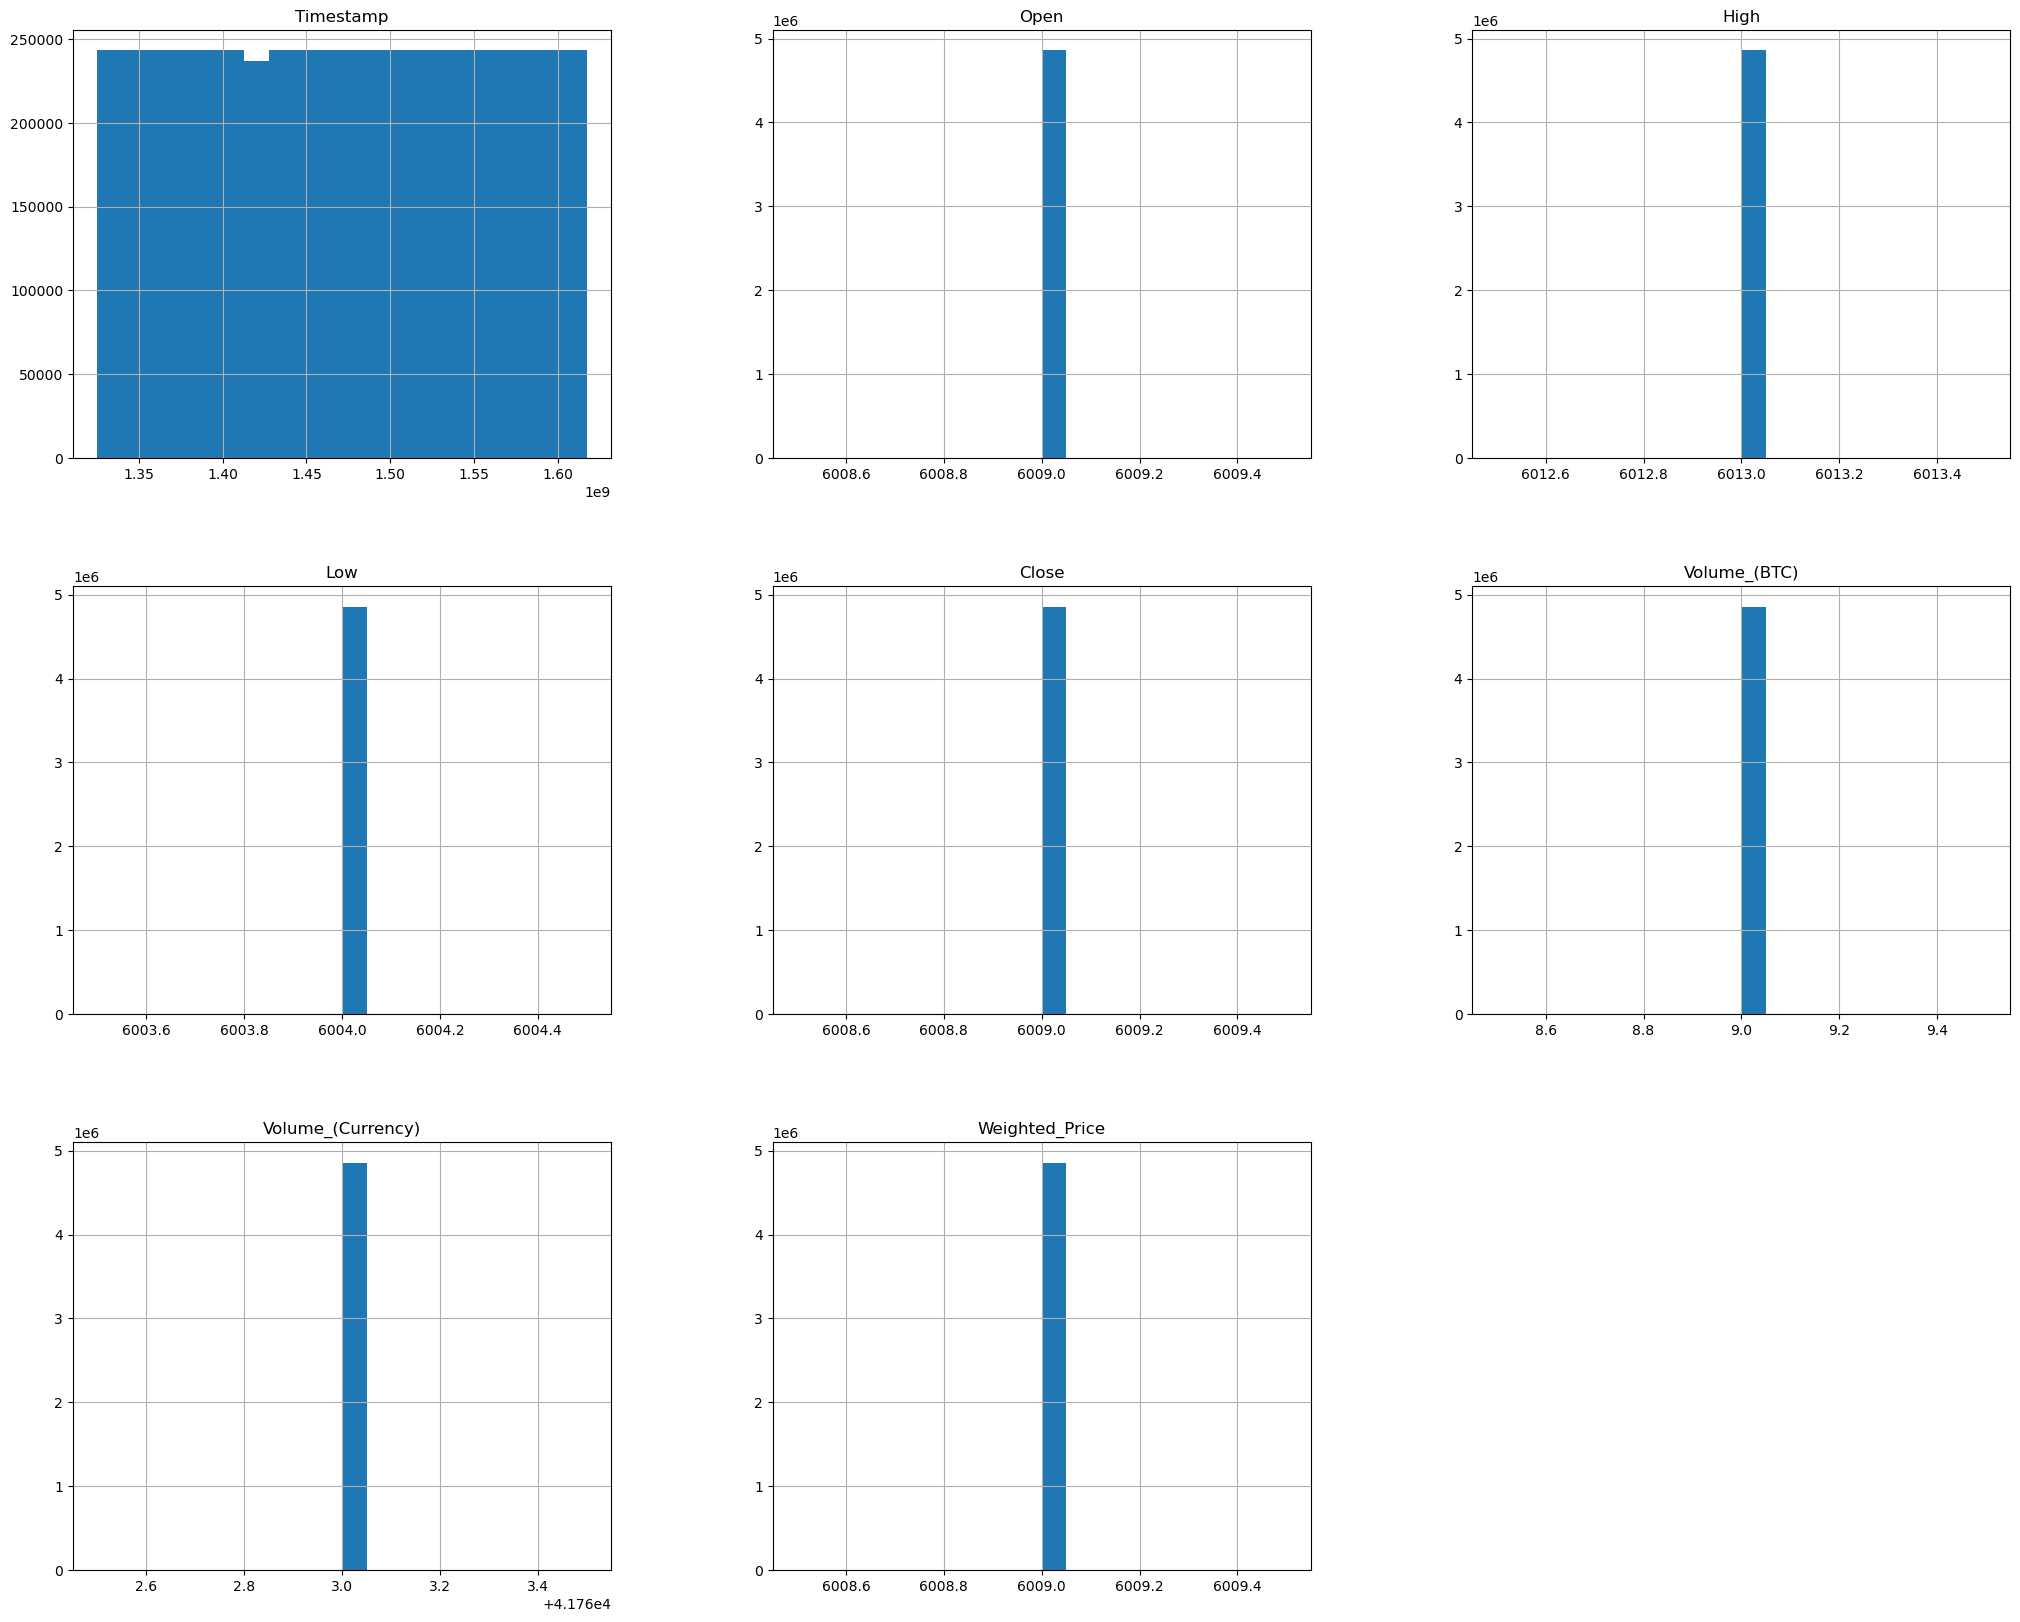

In [36]:
# Plot histograms for each numeric column in the DataFrame 'show_data'
# Display the plotted histograms
show_data.hist(bins=20, legend=False, figsize=(25, 20))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


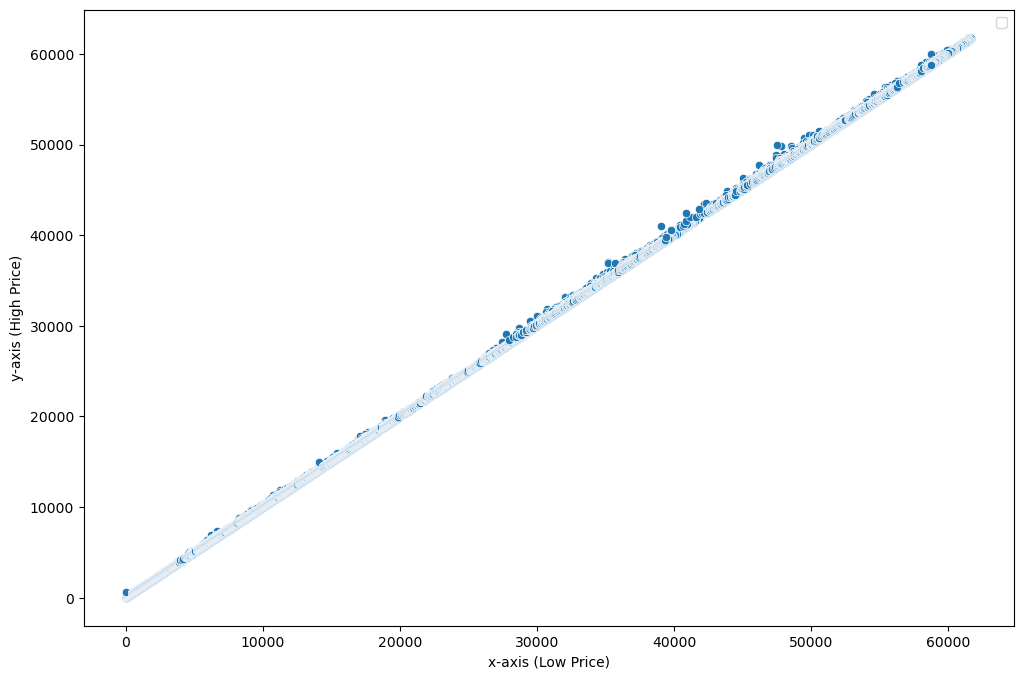

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Low', y='High', data=show_data)
plt.xlabel("x-axis (Low Price)")
plt.ylabel("y-axis (High Price)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


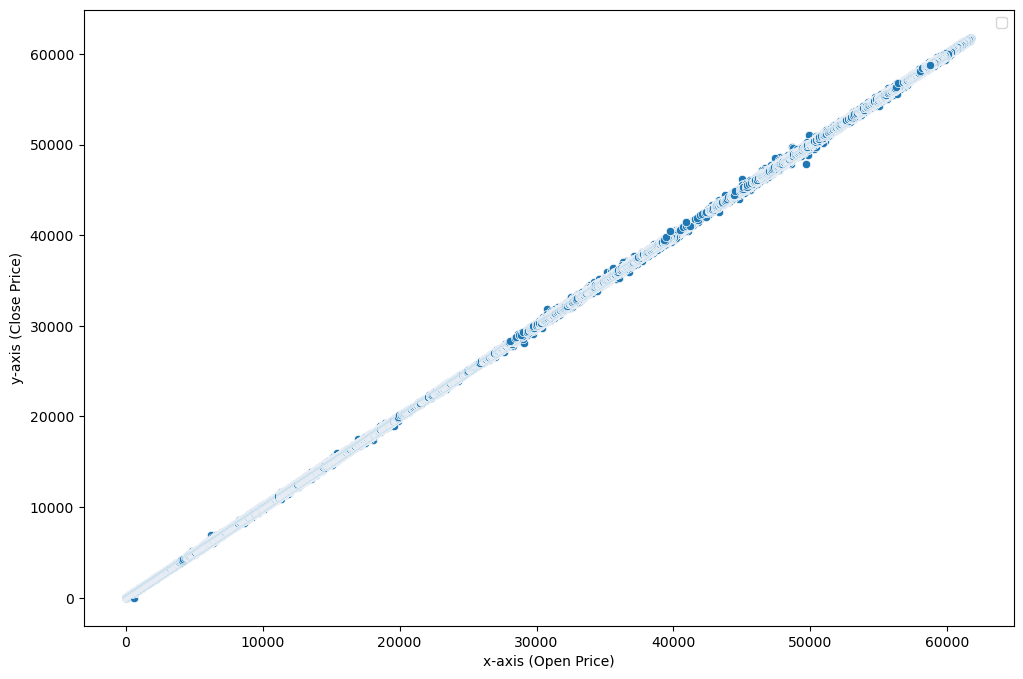

In [20]:
# Create a new figure with a specified size of 12 by 8 inches

# Create a scatter plot with 'Low' prices on the x-axis and 'High' prices on the y-axis
# 'show_data' is the DataFrame containing the data

plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=show_data)
plt.xlabel("x-axis (Open Price)")
plt.ylabel("y-axis (Close Price)")
# Display the legend for the plot
plt.legend()
# Display the scatter plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


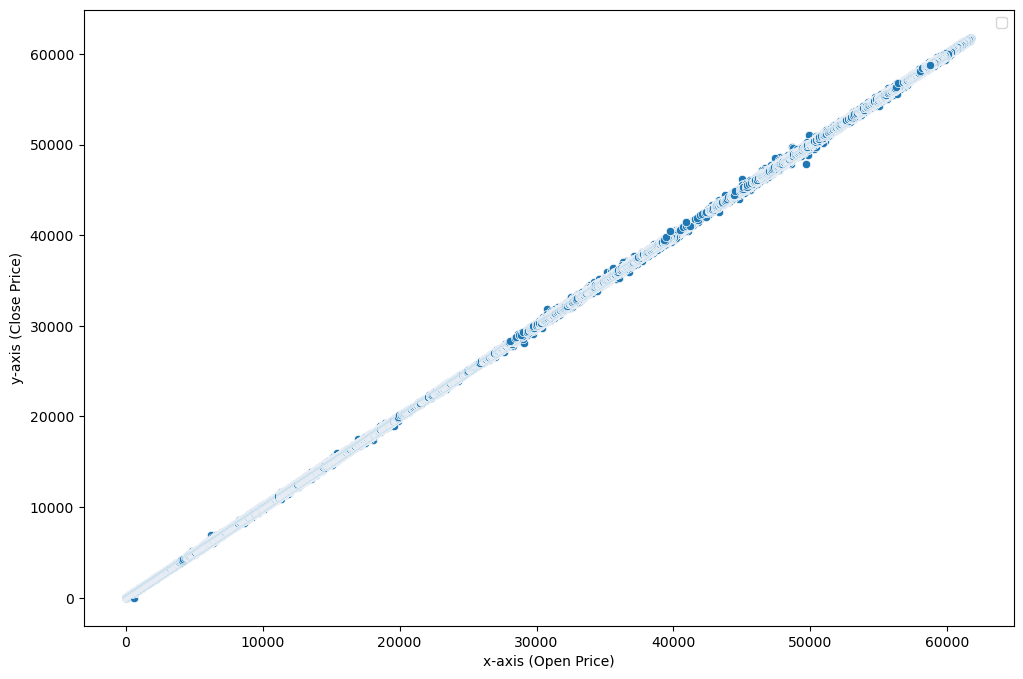

In [21]:
# Create a scatter plot with 'Open' prices on the x-axis and 'Close' prices on the y-axis
# 'show_data' is the DataFrame containing the data
plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=show_data)
plt.xlabel("x-axis (Open Price)")
plt.ylabel("y-axis (Close Price)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


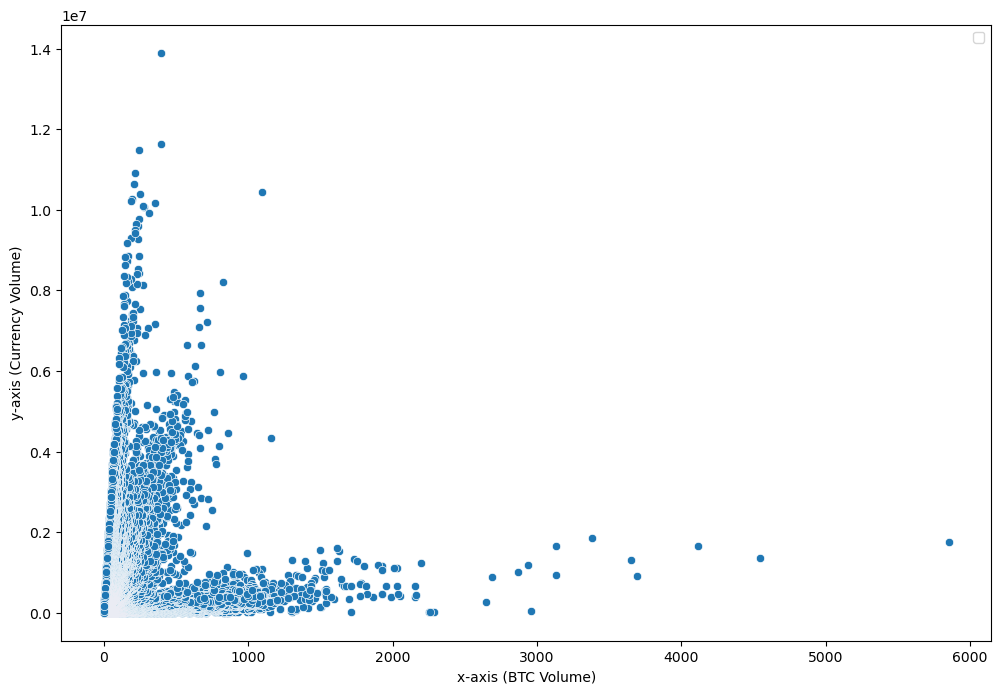

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Volume_(BTC)', y='Volume_(Currency)', data=show_data)
plt.xlabel("x-axis (BTC Volume)")
plt.ylabel("y-axis (Currency Volume)")
plt.legend()
plt.show()

In [23]:
show_data.isnull().value_counts()

Timestamp  Open   High   Low    Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price
False      False  False  False  False  False         False              False             3613769
           True   True   True   True   True          True               True              1243608
dtype: int64

<Axes: >

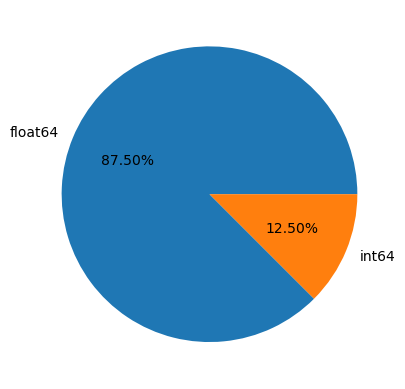

In [24]:
# Create a pie chart of the data types in the DataFrame 'show_data'
# 'dtypes' attribute returns the data types of each column
# 'value_counts()' counts the occurrences of each data type
# 'plot.pie()' creates a pie chart
# 'autopct' formats the percentage values on the pie chart with two decimal places
show_data.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

<Axes: >

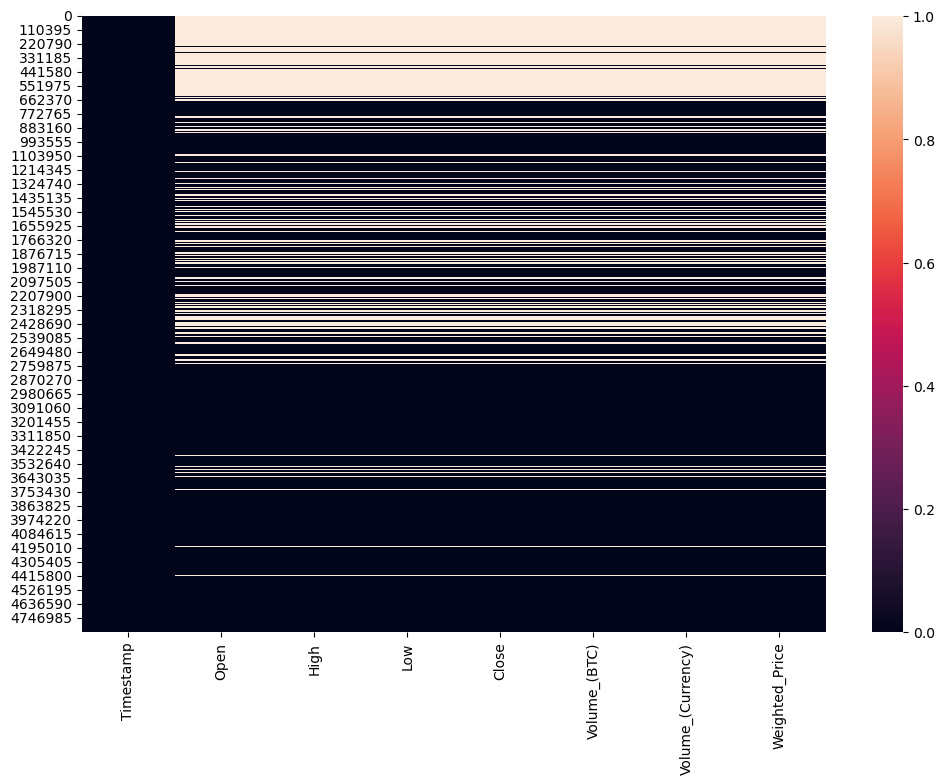

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(show_data.isnull())

In [26]:
all_cols = show_data.select_dtypes(include=('float','int')).columns
float_data = show_data.select_dtypes(include=('float')).columns
float_data

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [27]:
for z in float_data:
    show_data = show_data.apply(np.ceil)

In [28]:
#data.shape[0]
null_per = show_data.isnull().sum()/show_data.shape[0]*100
null_per

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

In [29]:
show_data['Open'] = int(show_data['Open'].mean())
show_data['High'] = int(show_data['High'].mean())
show_data['Low'] = int(show_data['Low'].mean())
show_data['Close'] = int(show_data['Close'].mean())
show_data['Volume_(BTC)'] = int(show_data['Volume_(BTC)'].mean())
show_data['Volume_(Currency)'] = int(show_data['Volume_(Currency)'].mean())
show_data['Weighted_Price'] = int(show_data['Weighted_Price'].mean())

In [30]:
show_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.325318e+09,6009,6013,6004,6009,9,41763,6009
1,1.325318e+09,6009,6013,6004,6009,9,41763,6009
2,1.325318e+09,6009,6013,6004,6009,9,41763,6009
3,1.325318e+09,6009,6013,6004,6009,9,41763,6009
4,1.325318e+09,6009,6013,6004,6009,9,41763,6009
...,...,...,...,...,...,...,...,...
4857372,1.617149e+09,6009,6013,6004,6009,9,41763,6009
4857373,1.617149e+09,6009,6013,6004,6009,9,41763,6009
4857374,1.617149e+09,6009,6013,6004,6009,9,41763,6009
4857375,1.617149e+09,6009,6013,6004,6009,9,41763,6009


<Axes: >

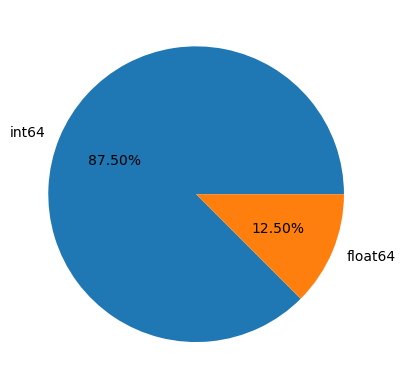

In [31]:
show_data.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

<Axes: >

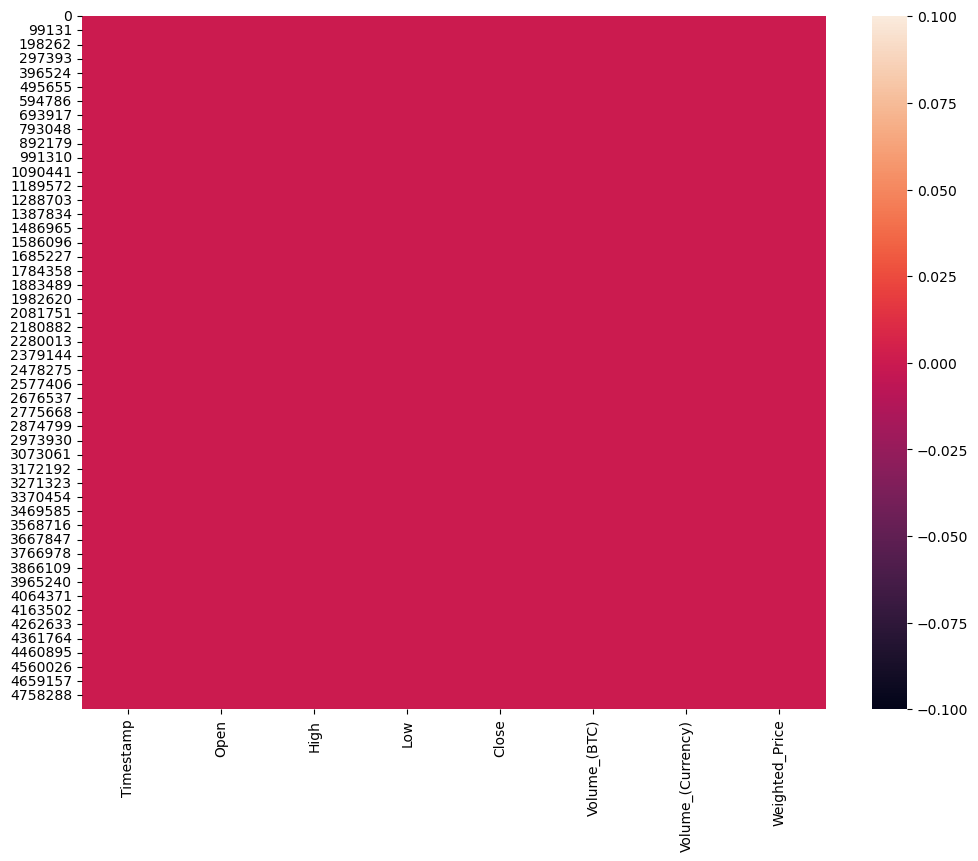

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(show_data.isnull())

In [33]:
x_data = show_data.drop('Weighted_Price', axis='columns')
y_data = show_data['Weighted_Price']

<Axes: >

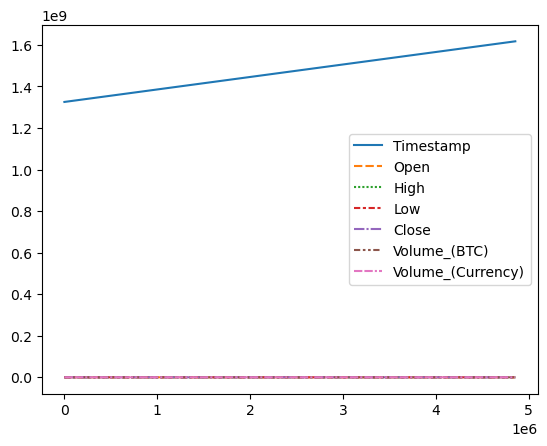

In [34]:
sns.lineplot(data=x_data)

<Axes: ylabel='Weighted_Price'>

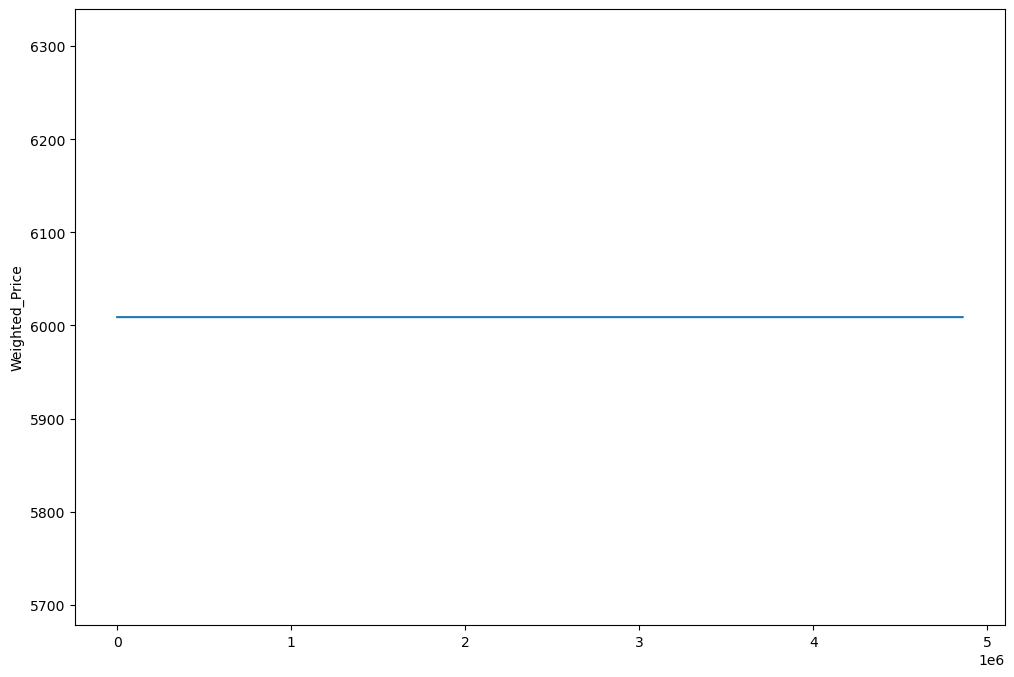

In [35]:
plt.figure(figsize=(12,8))
sns.lineplot(data=y_data)